<a href="https://colab.research.google.com/github/codeofarmour/prog_books_da_project/blob/master/Books_About_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Books About Programming Data Analysis**
An exploration of highly rated books.

**TODO:** Write a more thoughtful project introduction. Describe the dataset -- where I found it, what I hope to accomplish with it, and which tools and techniques I intend to use.

### Steps to follow:

* ~~Import dataset into Colab as a pandas dataframe~~
* Clean data
  - ~~Duplicate and anomalous entries removed~~
  - ~~No missing values allowed (prove with seaborn heatmap)~~
* Distribution is shown as either histograms, box plots/box & whisker plots, or frequency graphs
* The mean, median, mode, and any other relevant statistical measures for your data have been calculated
* At least 5 graphs that determine/demonstrate/show any meaningful correlations in your data; all graphs are presentable, accurate, and meaningful
  - Note the use of color, scale, labels, etc.
* The code has sufficient comments to describe why/what you are doing in each section
* The code runs fully without errors

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Import dataset and store it as a Pandas DataFrame

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codeofarmour/prog_books_da_project/master/prog_book.csv') 

In [3]:
# Prevent changes to original by assiging a copy of the df to a variable
book_data = df.copy()
book_data.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


#### Determine if there are discrepancies or inaccurate data type assignments

In [4]:
# It appears there are 4 qualitative data points, at least 3 quantitative data points 
book_data.dtypes

Rating             float64
Reviews             object
Book_title          object
Description         object
Number_Of_Pages      int64
Type                object
Price              float64
dtype: object

In [5]:
# Remove 0th index column - HOLD UNTIL CERTAIN NOT NEEDED
# book_data = book_data.iloc[: , 1:]

In [6]:
# Reviews are type object but should be type int64
# Must first remove ',' from the str objects before converting them to ints
book_data['Reviews'] = book_data['Reviews'].str.replace(',', '')

# Convert 'Reviews' str type to type int64
book_data['Reviews'] = book_data['Reviews'].astype('int64')

In [7]:
book_data.dtypes


Rating             float64
Reviews              int64
Book_title          object
Description         object
Number_Of_Pages      int64
Type                object
Price              float64
dtype: object

In [8]:
# Rename specific columns for brevity
book_data.rename(columns={'Book_title': 'Title', 'Number_Of_Pages': 'Pages'}, inplace=True)

book_data.head()

,Rating,Reviews,Title,Description,Pages,Type,Price
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [9]:
# Round 'Price' column to 2 decimal places
book_data['Price'] = book_data['Price'].apply(lambda x: round(x, ndigits=2))

In [10]:
# Check for null values in dataset
book_data.isnull().values.any()

False

In [11]:
# Check for duplicate rows
book_data.duplicated().sum()

0

In [12]:
# TODO - increase figsize


In [13]:
book_data['Price']

0        9.32
1       11.00
2       11.27
3       12.87
4       13.16
        ...  
266    203.11
267    212.10
268    220.39
269    220.39
270    235.65
Name: Price, Length: 271, dtype: float64

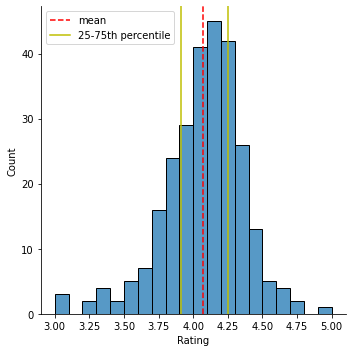

In [14]:
# Plot out distribution of Ratings
sns.displot(df['Rating'])

# Plot the mean
plt.axvline(x=np.mean(df['Rating']), c='r', ls='--', label='mean')

# Plot the 25-75th percentile
plt.axvline(x=np.percentile(df['Rating'], 25), c='y', ls='-', label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c='y', ls='-')

plt.legend()
plt.show()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4935cdc50>


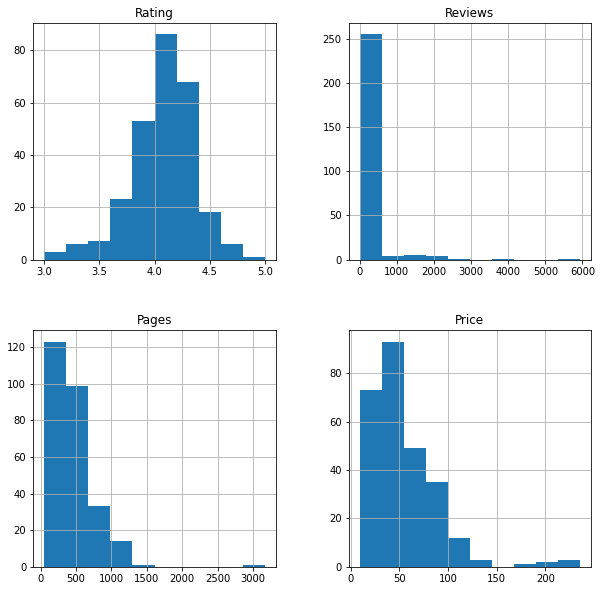

In [33]:
# Plot all other numeric variables and their distributions
book_data.hist(figsize=(10,10))

In [16]:
# Price and Number_Of_Pages seem highly correlated as they're both skewing right

#### Do book types influence ratings and why?

In [17]:
results = book_data.groupby('Type').sum()
results

# TODO: Add total sales column at the beginning in order to compare reviews/sales, etc.

,Rating,Reviews,Pages,Price
Type,,,,
Boxed Set - Hardcover,4.49,36,896,220.39
Hardcover,385.69,29942,58374,6662.76
Kindle Edition,40.15,1565,2834,323.85
Paperback,633.96,18136,63442,7139.90
Unknown Binding,7.98,247,498,74.43
ebook,30.00,360,2702,359.46


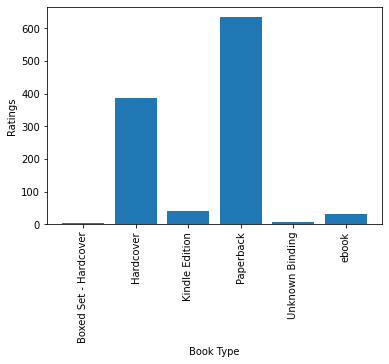

In [18]:
types = [type for type, book_data in book_data.groupby('Type')]

plt.bar(types, results['Rating'])

plt.xticks(types, rotation='vertical', size=10)
plt.ylabel('Ratings')
plt.xlabel('Book Type')

plt.show()

In [19]:
book_data

,Rating,Reviews,Title,Description,Pages,Type,Price
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.32
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.00
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.27
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.87
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.16
...,...,...,...,...,...,...,...
266,3.76,0,3D Game Engine Architecture: Engineering Real-...,Dave Eberly's 3D Game Engine Design was the fi...,752,Hardcover,203.11
267,3.94,22,An Introduction to Database Systems,"Continuing in the eighth edition, An Introduct...",1040,Paperback,212.10
268,4.49,36,"The Art of Computer Programming, Volumes 1-3 B...",Knuth's classic work has been widely acclaimed...,896,Boxed Set - Hardcover,220.39
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.39


In [29]:
# Sort from highest Rating to lowest
highest_all = book_data.nlargest(5, 'Rating')

,Rating,Reviews,Title,Description,Pages,Type,Price
54,5.00,0,Your First App: Node.js,A tutorial for real-world application developm...,317,ebook,25.86
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.39
131,4.72,362,Designing Data-Intensive Applications: The Big...,Want to know how the best software engineers a...,616,Paperback,45.56
114,4.67,1,Build Web Applications with Java: Learn every ...,This book is primarily intended for beginners ...,372,Paperback,42.28
194,4.67,78,"Fluent Python: Clear, Concise, and Effective P...",Python's simplicity lets you become productive...,792,Paperback,64.09


In [32]:
# Books with 'Python' in the title
python_books = book_data[book_data['Title'].str.contains('Python')]
len(python_books)

14

In [31]:
# Books with Python in description
python_in_desc = book_data[book_data['Description'].str.contains('Python')]
len(python_in_desc)

16